In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import os
root_dir = '폴더 경로'

dataset = pd.read_csv(os.path.join(root_dir, "play_tennis.csv"))

In [42]:
dataset

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [43]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

dataset['outlook'] = Le.fit_transform(dataset['outlook'])
dataset['temp'] = Le.fit_transform(dataset['temp'])
dataset['humidity'] = Le.fit_transform(dataset['humidity'])
dataset['wind'] = Le.fit_transform(dataset['wind'])
dataset['play'] = Le.fit_transform(dataset['play'])

In [44]:
dataset

,day,outlook,temp,humidity,wind,play
0,D1,2,1,0,1,0
1,D2,2,1,0,0,0
2,D3,0,1,0,1,1
3,D4,1,2,0,1,1
4,D5,1,0,1,1,1
5,D6,1,0,1,0,0
6,D7,0,0,1,0,1
7,D8,2,2,0,1,0
8,D9,2,0,1,1,1
9,D10,1,2,1,1,1


In [45]:
y = dataset['play']
X = dataset.drop(['play'],axis=1).drop(['day'],axis=1)

In [46]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion = 'entropy')
clf = clf.fit(X, y)

In [47]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None, filled=True, class_names=["home","play tennis"]) 
graph = graphviz.Source(dot_data) 

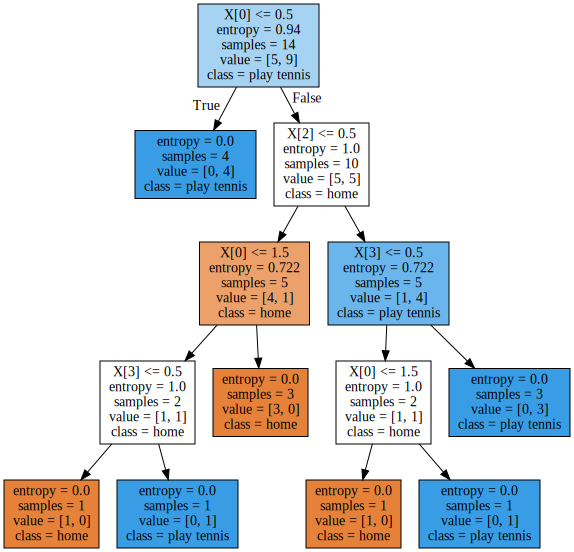

In [ ]:
graph

In [ ]:
# X[0] <= 0.5 : outlook이 0인 경우
# 파랑이 play tennis, 주황이 home!

# 5주차 과제 : iris data로 decision tree 분류기 사용해보기

## iris data
* `DESCR`: 데이터셋의 정보를 보여줍니다.
* `data`: feature data.
* `feature_names`: feature data의 컬럼 이름
* `target`: label data (수치형)
* `target_names`: label의 이름 (문자형)

In [48]:
# 과제

from sklearn.datasets import load_iris 
iris = load_iris() # 데이터 불러오기

import pandas as pd 
import numpy as np

# (1) Iris data 전처리
data = iris['data']
feature_names = # 코드입력
target = iris['target']

df_iris = pd.DataFrame(data, columns=feature_names)
df_iris['target'] = # 코드입력

from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = # starify 코드입력

# (2) tree 모델 적합
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.# model fitting 코드입력
dtc_pred = dtc.predict(x_valid)


In [49]:
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image

# 이미지 생성 함수. 실행만 해주시면 돼요!
def graph_tree(model):
    # .dot 파일로 export 해줍니다
    export_graphviz(model, out_file='tree.dot')
    # 생성된 .dot 파일을 .png로 변환
    call(['dot', '-Tpng', 'tree.dot', '-o', 'decistion-tree.png', '-Gdpi=600'])
    # .png 출력
    return Image(filename = 'decistion-tree.png', width=500)

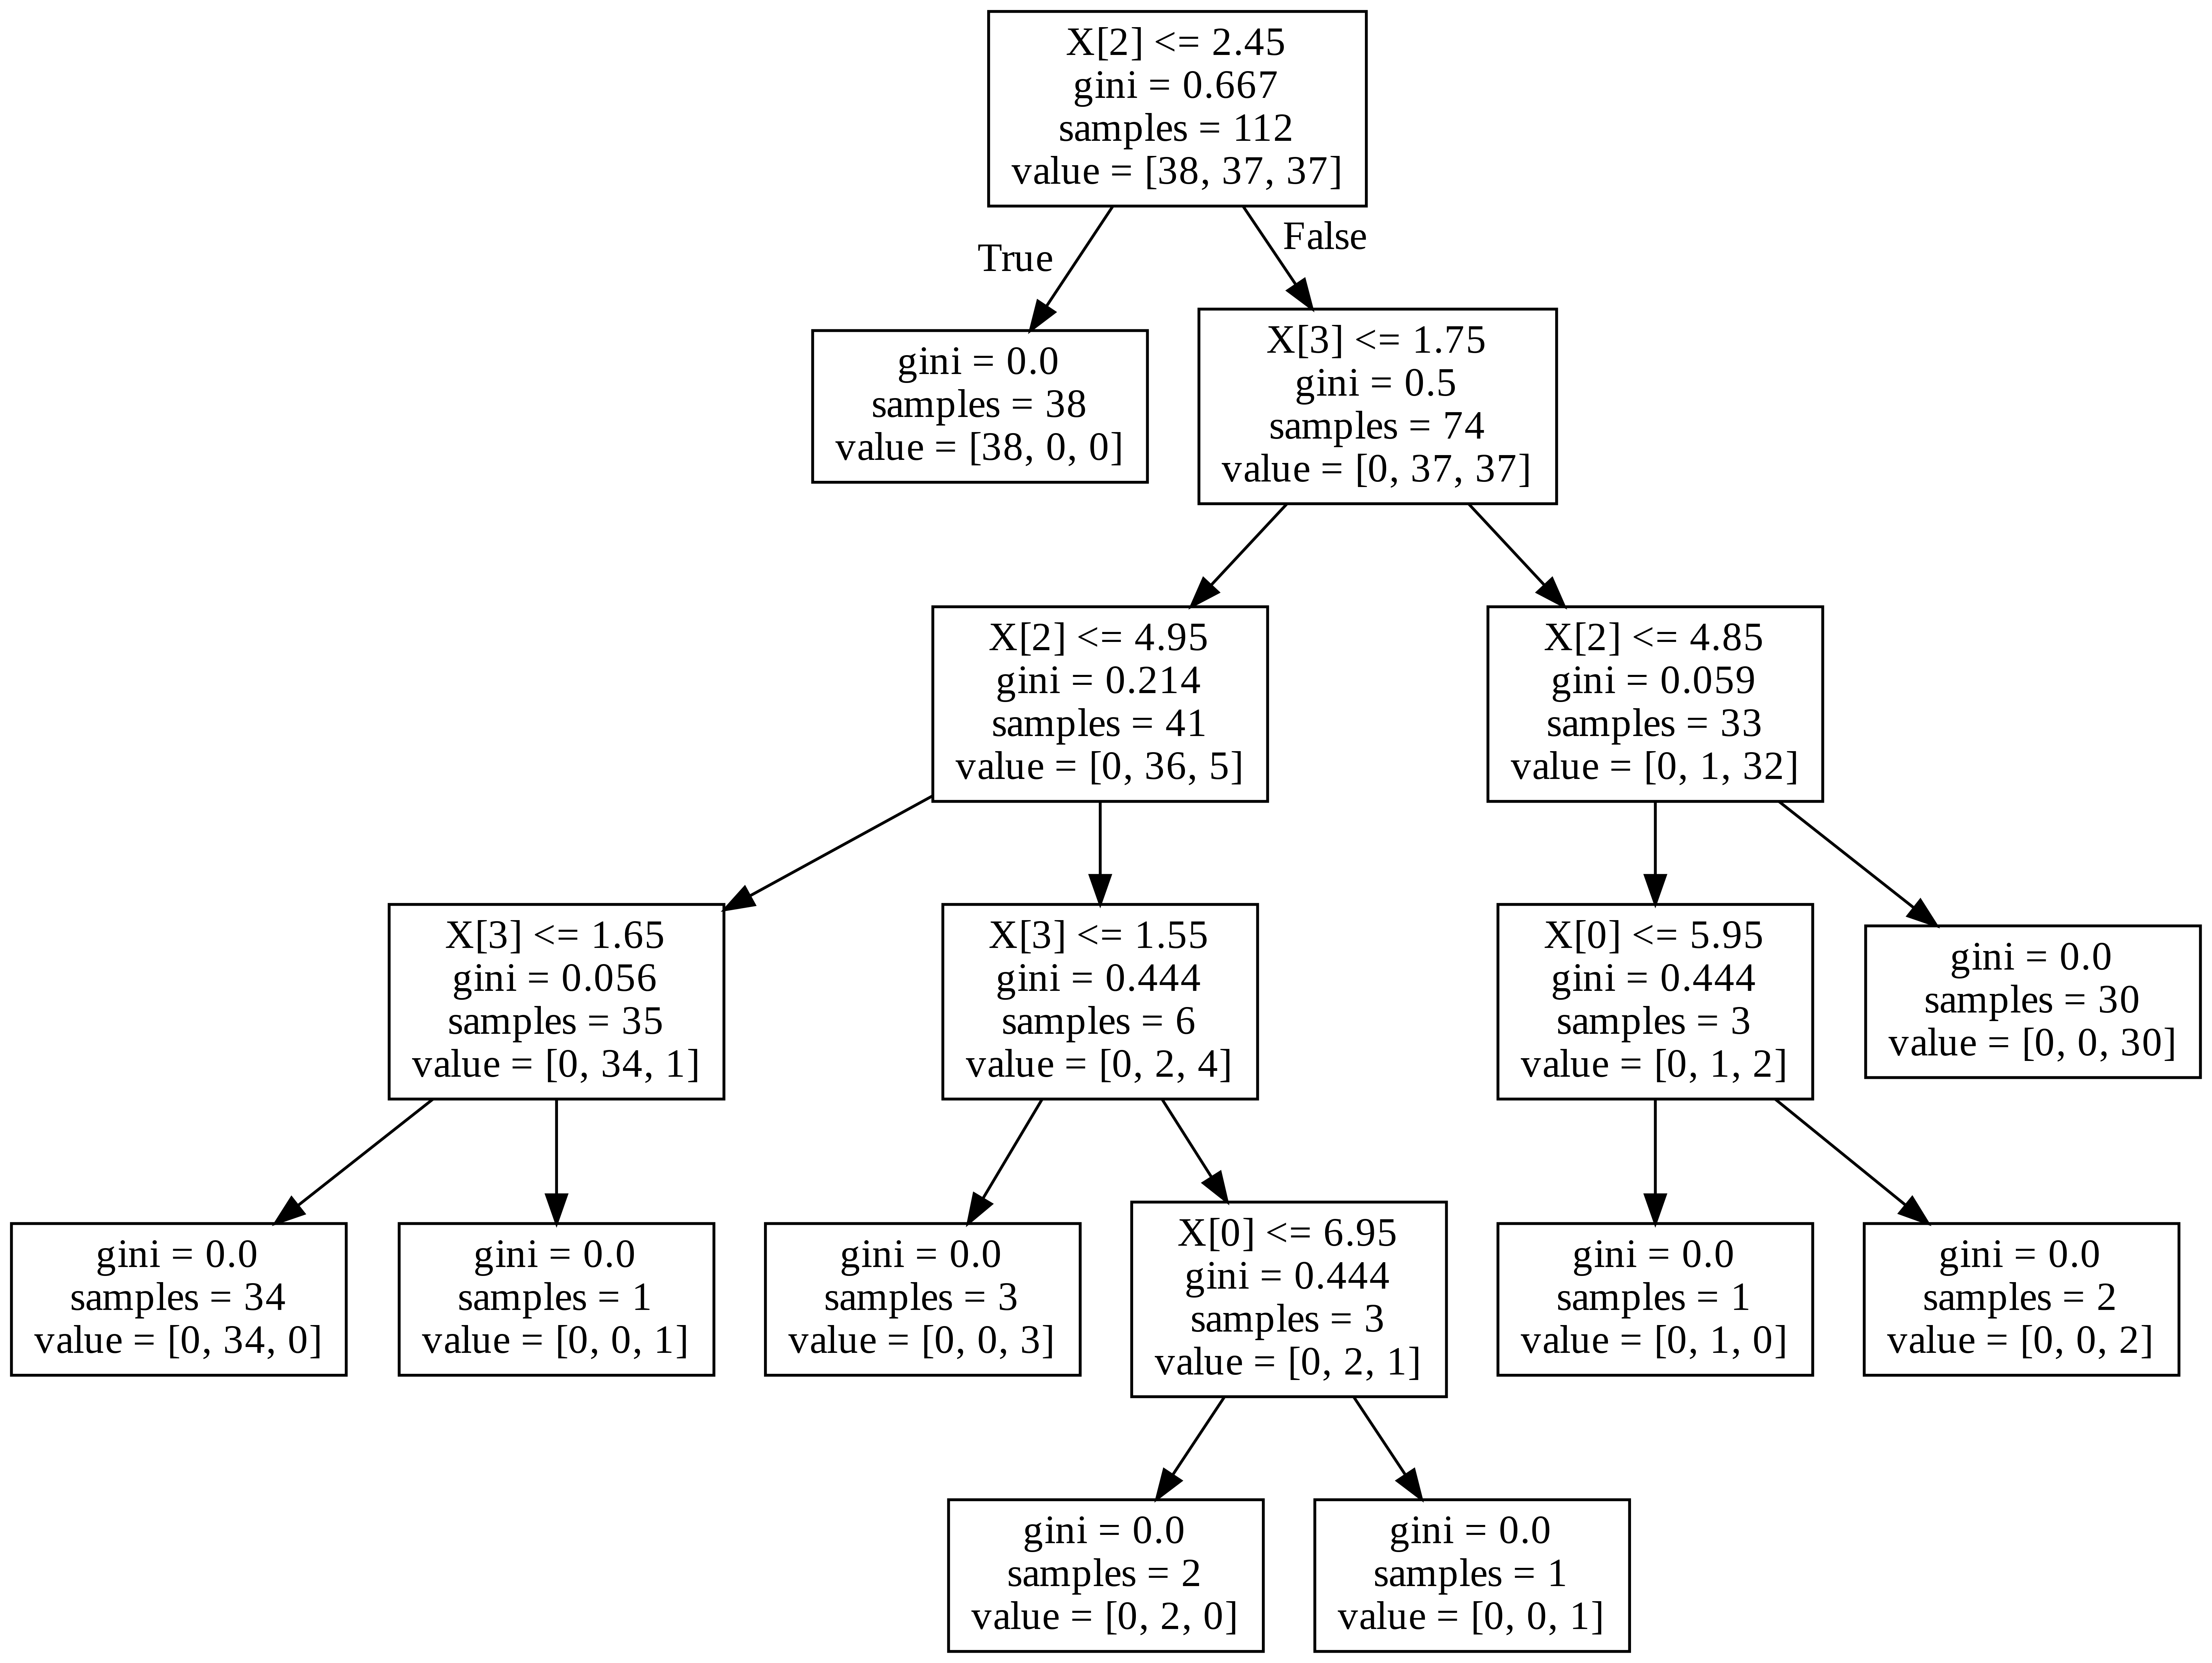

In [22]:
# 위의 함수 실행하는 코드 입력(visualization)


*** gini계수: 불순도를 의미하며, 계수가 높을 수록 엔트로피가 크다는 의미.

In [50]:
# Accuracy 알려주는 함수 호출 --> 지난 주 코드를 참고해 완성하세요
from sklearn.metrics import accuracy_score
# 코드 입력해 accuracy score 출력


Accuracy: 0.95


*** stratiify : label의 클래스 분포를 균등하게 배분

In [51]:
from sklearn.model_selection import train_test_split
import seaborn as sns
x_train, x_valid, y_train, y_valid = train_test_split(df_iris.drop('target',1), df_iris['target'])

In [52]:
x_train.shape, y_train.shape

((112, 4), (112,))

In [53]:
x_valid.shape, y_valid.shape

((38, 4), (38,))

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


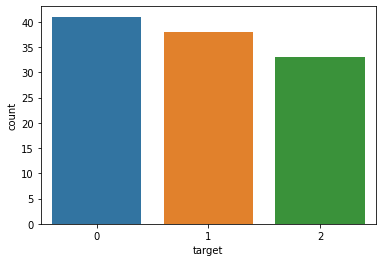

In [54]:
sns.countplot(y_train)

In [55]:
x_train, x_valid, y_train, y_valid = train_test_split(df_iris.drop('target',1), df_iris['target'], stratify=df_iris['target'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


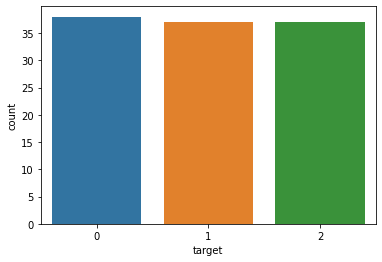

In [56]:
sns.countplot(y_train)

In [57]:
x_train.shape, y_train.shape

((112, 4), (112,))

In [58]:
x_valid.shape, y_valid.shape

((38, 4), (38,))